# **Lab 18: Quantum Error Correction**
---

### **Description**
In this week's lab, we will implement a bit flip error correcting code and simulate circuits with several different noise models in Cirq.

<br>

### **Structure**
**Part 1**: [Bit Flip Code](#p1)

**Part 2**: [Cirq Noise Models](#p2)



<br>

### **Learning Objectives**
By the end of this lab, we will:
* Recognize how to implement a bit flip code using cirq.
* Recognize how to test an error correcting code using cirq generally and with noise models.

<br>

### **Resources**
* [Noisy Simulations Cheat Sheet
](https://docs.google.com/document/d/1Ex2m3dp5-_z8XN8EiBv6PUptHWrTLDpsKYU662oTy4A/edit#heading=h.exb19quwqzr9)

* [Cirq Cheat Sheet](https://docs.google.com/document/d/1j0vEwtS6fK-tD1DWAPry4tJdxEiq8fwMtXuYNGRhK_M)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]
plt.rcParams.update({'font.size': 8})

try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

installing cirq...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.7 MB/s eta 0:00:00
    

<a name = "p1"></a>

---
## **Part 1: Bit Flip Code**
---

In this section, we will implement and explore a 3-qubit bit flip error correcting code using our 5 step process:
1. Encoding
2. Sending Over Noisy Channel
3. Error Detection
4. Error Correction
5. Decoding

#### **Step #1: Encoding**

**Together**, let's create a 3-qubit bit flip encoded quantum circuit. Specifically,
1. Initialize a circuit with 3 qubits.

2. Entangle the state of $q_0$ with the other two qubits.

[link text](https://)##### **1. Initialize a circuit with 3 qubits and 1 classical bit.**

In [ ]:
qubits = cirq.NamedQubit.range(3, prefix="q")
encode_circuit = cirq.Circuit()

##### **2. Entangle the state of $q_0$ with the other two qubits.**

This can be accomplished by applying two CNOT gates controlled by $q_0$ and targeting the other qubits, $q_1$ and $q_2$.

In [ ]:
encode_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
encode_circuit.append(cirq.CNOT(qubits[0], qubits[2]))
encode_circuit

q0: ───@───@───
       │   │
q1: ───X───┼───
           │
q2: ───────X───

#### **Step #2: Sending Over Noisy Channel**

**Together**, let's create a new circuit to represent the noisy channel and sepcifically simulate a bit-flip error on $q_0$. **Hint**: What gate flips a qubit from $|0\rangle$ to $|1\rangle$?

In [ ]:
noisy_channel_circuit = cirq.Circuit()

noisy_channel_circuit.append(cirq.X(qubits[0]))

noisy_channel_circuit

q0: ───X───

#### **Step #3: Error Detection**

Next, we will create a circuit to detect if there's been an error by checking the *parity* (do they agree with each other or are they different?) of $q_0$ with the other qubits using CNOT gates.

In [ ]:
detection_circuit = cirq.Circuit()

detection_circuit.append(cirq.CNOT(qubits[0], qubits[1]))
detection_circuit.append(cirq.CNOT(qubits[0], qubits[2]))

detection_circuit

q0: ───@───@───
       │   │
q1: ───X───┼───
           │
q2: ───────X───

#### **Step #4: Error Correction**

We will now create a circuit to update $q_0$ if both $q_1$ and $q_2$ have detected a bit flip so that $q_0$ stores the correct logical state. Specifically, apply the Toffoli (CCX) gate controlled by $q_2$ and $q_1$, targeting $q_0$.

In [ ]:
correction_circuit = cirq.Circuit()

correction_circuit.append(cirq.CCNOT(qubits[1], qubits[2], qubits[0]))

correction_circuit

q0: ───X───
       │
q1: ───@───
       │
q2: ───@───

#### **Step #5: Decoding**

Lastly, the logical state has been stored in $q_0$, so we will
create a decoding circuit to measure this qubit in order to decode the final logical state.

In [ ]:
decode_circuit = cirq.Circuit()

decode_circuit.append(cirq.measure(qubits[0]))

decode_circuit

q0: ───M───

In [ ]:
# COMPLETE THIS CODE

#### **Problem #1.1**

Now, let's simulate the results of performing each of these steps by adding the circuits together and simulating 100 times (to ensure our error correction code really works).

<br>

**Before looking at the result, let's ask ourselves: what state should we expect to measure?**

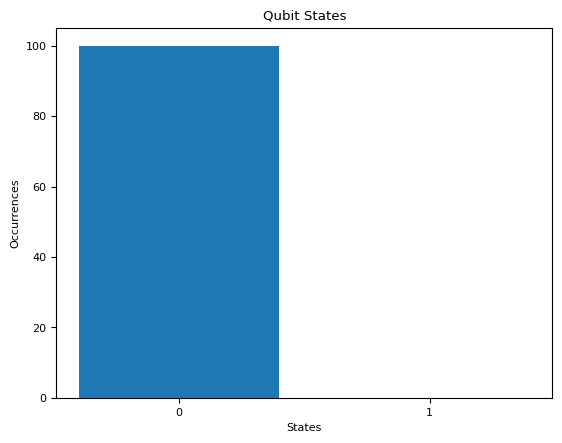

In [ ]:
bitflip_circuit = encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

# COMPLETE THIS CODE
#print(bitflip_circuit)

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.2**

**Together**, let's use our code from above so that the logical qubit is in the $|1\rangle$ state instead of the $|0\rangle$ state.

<br>

**NOTE**: Since we have built the step encoding from logical to physical qubits already, we only need to prepare the $q_0$ in the desired state.

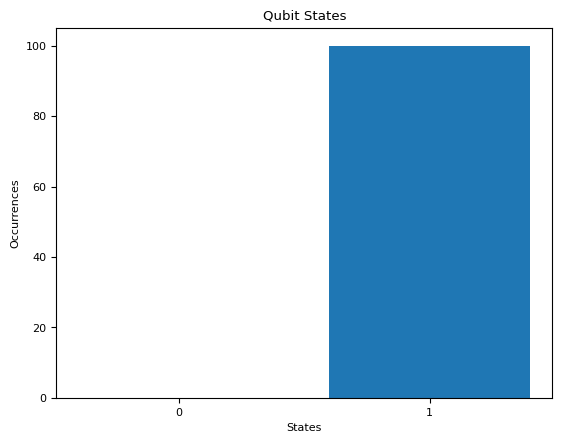

In [ ]:
# PREPARATION
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.X(qubits[0]))

# SIMULATING
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.3**

Now modify the code to prepare the logical qubit in the $|+\rangle$ state.

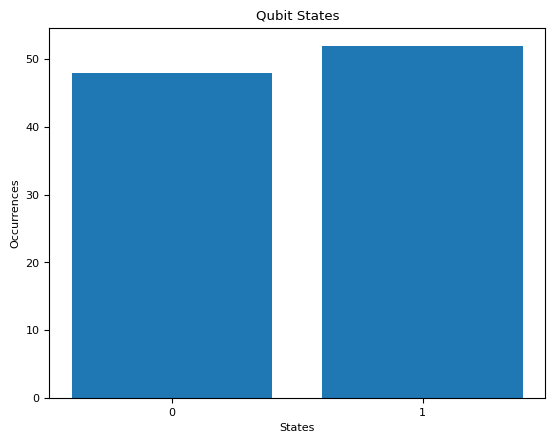

In [ ]:
# COMPLETE THIS CODE
prepare_circuit = cirq.Circuit()
prepare_circuit.append(cirq.H(qubits[0]))

# SIMULATING
bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#### **Problem #1.4**

You hopefully saw a mix of 0s and 1s indicating a roughly equal superposition. However, it's hard to tell if this is $|+\rangle$ or if it's incurred an error and is now $|-\rangle$ or even a different superposition.

<br>

Add a gate to $q_0$ right before decoding to rotate it's state into the computational basis so that we can be sure if the error has been corrected. **Hint**: Assuming $q_0$ is in $|+\rangle$ state, what gate can we apply so that it ends up as $|0\rangle$?

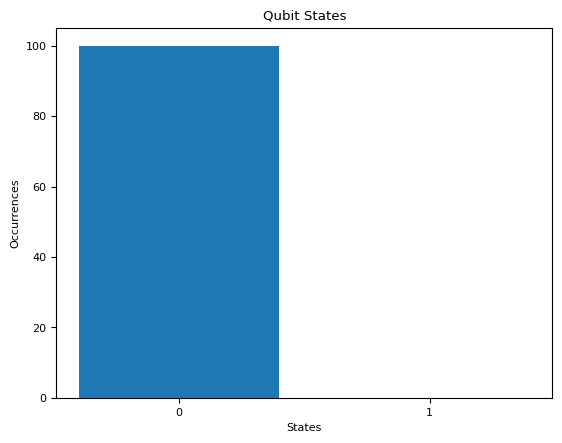

In [ ]:
# COMPLETE THIS CODE
added_gate_circuit = cirq.Circuit()
added_gate_circuit.append(cirq.H(qubits[0]))

bitflip_circuit = prepare_circuit + encode_circuit + noisy_channel_circuit + detection_circuit + correction_circuit + added_gate_circuit + decode_circuit

sim = cirq.Simulator()
result = sim.run(bitflip_circuit, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(1))

plt.show()

#End of notebook
---
© 2024 The Coding School, All rights reserved